Craig Wilcox: Exploritory Data Analysis on mpg dataset
Purpose: to perform exploratory analysis on clean already collected data

Author: Craig Wilcox
Date February 17, 2025

In [5]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterlab
import pyarrow

In [6]:
#Load Data Set and display columns to ensure proper Data
# Load MPG dataset into Dataframe
mpg_df: pd.DataFrame = sns.load_dataset('mpg')
# List column names
mpg_df.columns
# Inspect first few rows of the DataFrame
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Data Description:

Data included in this data set has vehicles with year, make, and model with numerical columns with details of that vehicle.
Columns to analyze: Miles per gallon, cylinders, displacement, horsepower, weight, acceleration.

In [7]:
# Initial data inspection - Display 10 rows of data

mpg_df.head(10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [8]:
# Initial data inspection - number of rows and columns

mpg_df.shape

(398, 9)

In [9]:
# Initial data inspection - Data types

mpg_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [10]:
# Initial data inspection - Summary Statistics of columns

mpg_df.describe

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

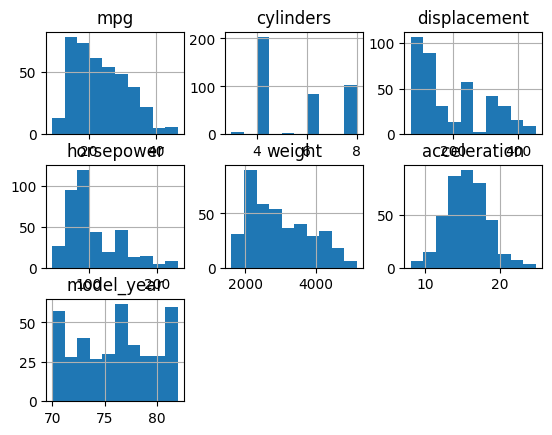

In [11]:
# Initial data inspection - Initial Data Distribution for Nuerical Columns

mpg_df.hist()
plt.show()


Ititial Data Findings

This Data has many numerical columns that can be used for data analysis. The Data is clean and no errors in running the initial data inspection.

Based on the column data at this time the three columns that appear to have distributions to be expected are MPG, Displacement, and Acceleration. The other columns are mostly years and items that would describe the individual vehicles in the data rather than perform analysis on the data.

In [12]:
# Individual column value counts
mpg_df['mpg'].value_counts()


mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
28.1     1
24.2     1
30.7     1
22.4     1
44.0     1
Name: count, Length: 129, dtype: int64

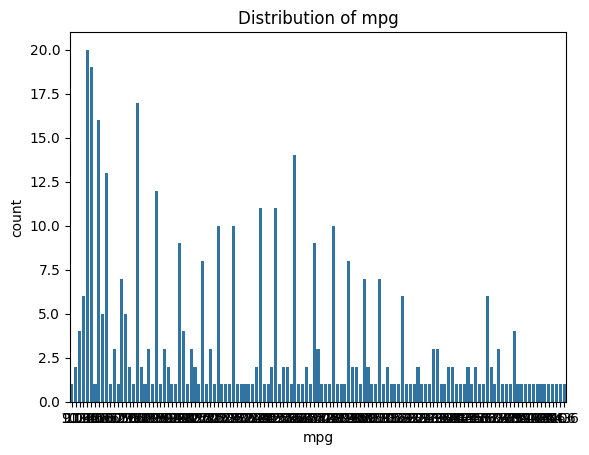

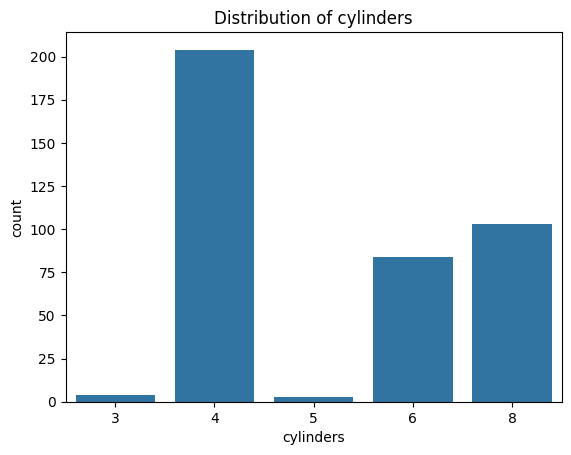

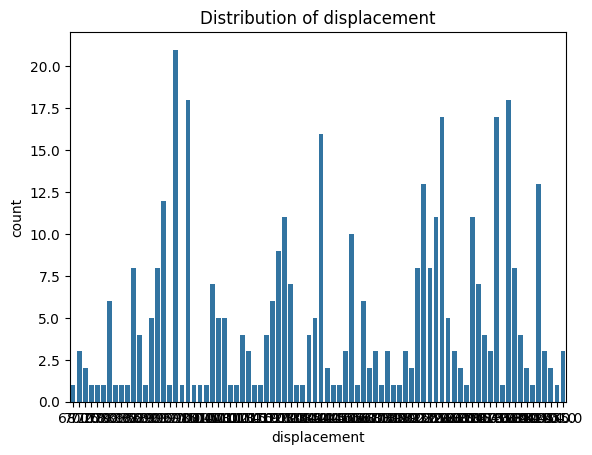

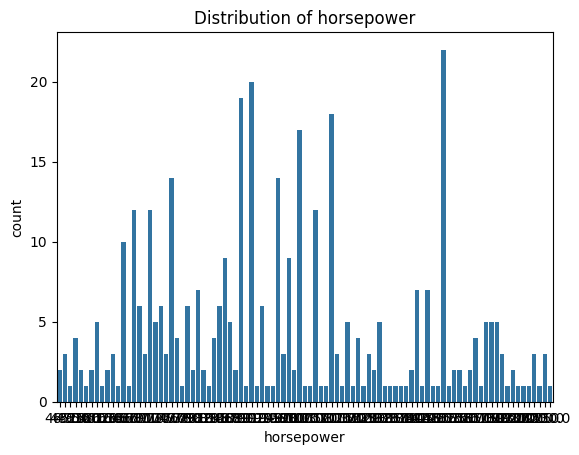

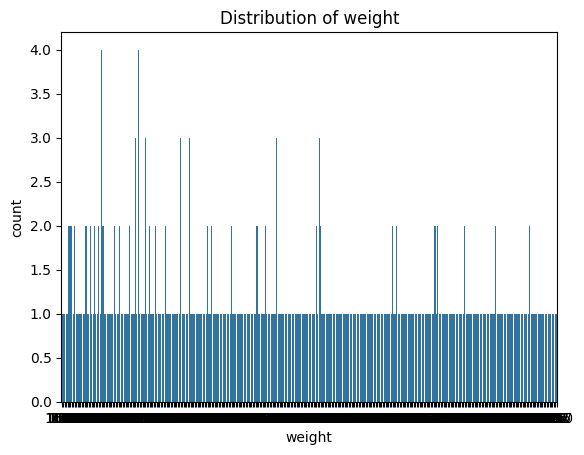

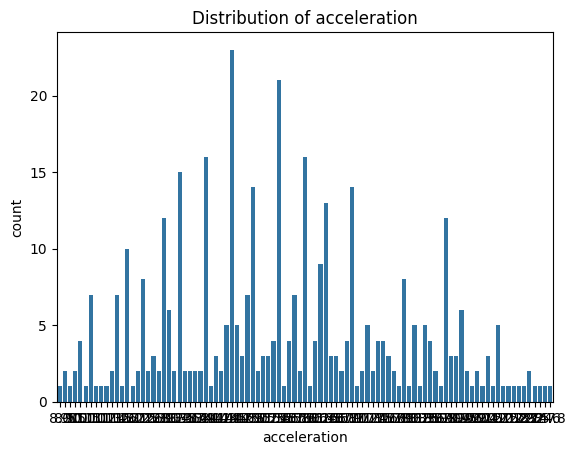

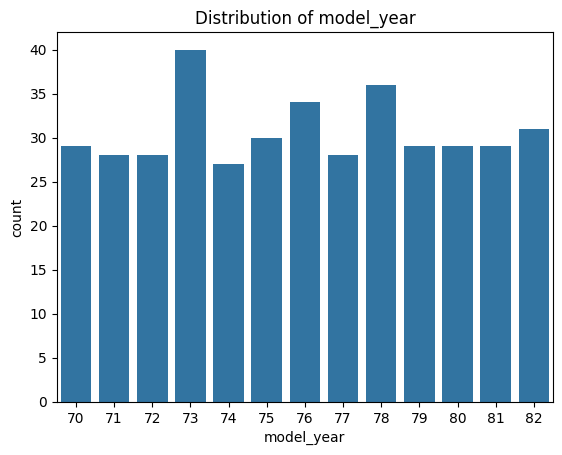

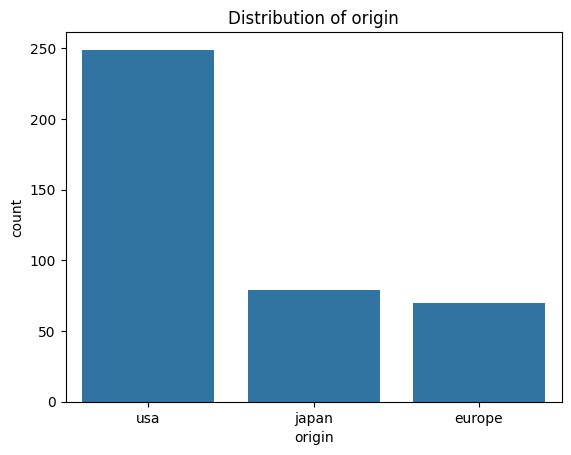

In [13]:
# Value counts for all columns - Exclude name column
for col in mpg_df.select_dtypes(include=['object', 'category', 'int', 'float']).columns:
    if col == 'name':
        continue
    # Display count plot
    sns.countplot(x=col, data=mpg_df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

Observations of data distribution
Note: did not run distribution of column "name" as this would not serve a data analysis purpose as there are no duplicate names on this list.



In [14]:
# Rename column name to make/model

mpg_df.rename(columns={'name':'make/model'}, inplace=True)

# Display first 10 rows with new column name

mpg_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make/model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


By changing the column name to make/model this should be more descriptive 

In [17]:
# Add column that states if mpg is equal to or greater than 25

mpg_df['mpg above 25'] = mpg_df['mpg'].apply(lambda x: 'Yes' if x >= 25 else 'No')

# Display first 10 rows with additional column

mpg_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,make/model,mpg above 25
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,No
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,No
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,No
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,No
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,No
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,No
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,No
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,No
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,No
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,No


Adding this column will allow simple and fast analysis later in this project to try and relate other factors in the data to more fuel efficiency

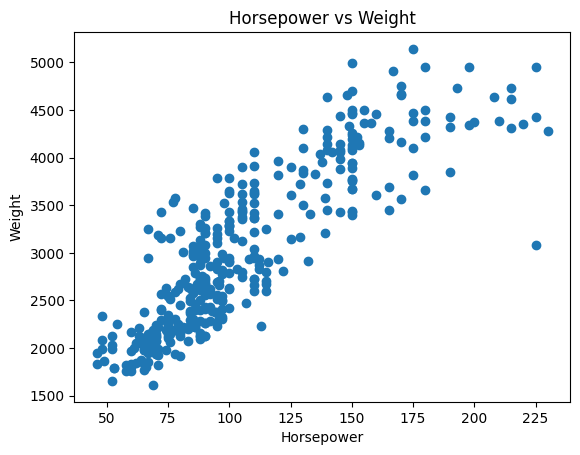

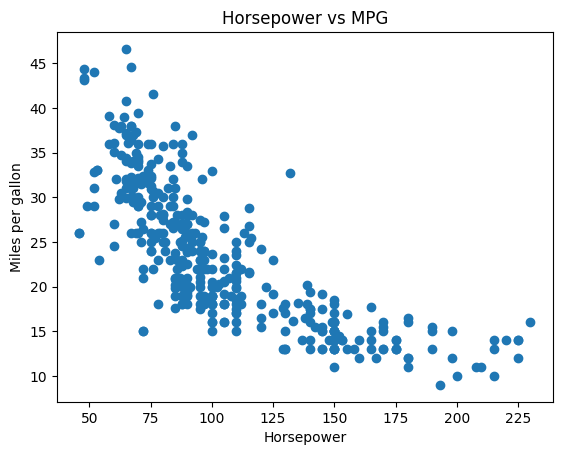

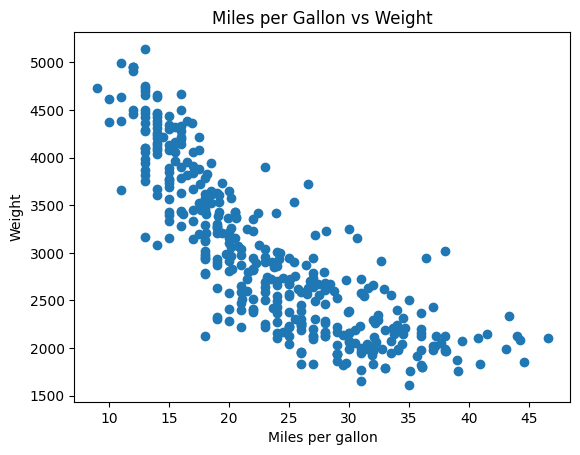

In [23]:
# Display 3 scatter plot charts for comparison
# Chart 1 is horsepower compared to weight
plt.scatter(mpg_df['horsepower'], mpg_df['weight'])
plt.title('Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show ()

#Chart 2 is miles per gallon compared to horsepower
plt.scatter(mpg_df['horsepower'], mpg_df['mpg'])
plt.title('Horsepower vs MPG')
plt.ylabel('Miles per gallon')
plt.xlabel('Horsepower')
plt.show ()

# Chart 3 is miles per gallon compared to weight
plt.scatter(mpg_df['mpg'], mpg_df['weight'])
plt.title('Miles per Gallon vs Weight')
plt.xlabel('Miles per gallon')
plt.ylabel('Weight')
plt.show ()


Three charts showing relationships between MPG, Horsepower, and Weight.